In [107]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [108]:
#Importing dataset we want to train and test model with
data = pd.read_csv('datasets/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Now what we have to do is some data cleaning

1. handling missing values

2. Handling duplicate data

3. Handling outliers

4. Handling inconsistent data

5. Handling categorical data

6. Feature scaling

In [109]:
data.shape

(13320, 9)

In [110]:
# dropping some columns that i think isn't really necessary
data = data.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [111]:
#checking if there are any empty cells in the dataset
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [112]:
#dropping all rows with any empty empty cell
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [113]:
#coverting the size category to only numbers
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [114]:
data['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [115]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [116]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [117]:
#this shows the rows comtaining total_sqft value which are like a range
data[~data['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [118]:
#this function takes the ranges in the total-sqft and returns the average
def convert_sqrt_to_num(x):
    token = x.split('-')
    if (len(token)==2):
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [119]:
convert_sqrt_to_num('2100 - 2900')

2500.0

In [120]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqrt_to_num)

In [121]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [122]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [123]:
data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [124]:
#this removes all whitespaces at the begining or the end of the location name
data['location'] = data['location'].apply(lambda x: x.strip())

In [125]:
len(data.location.unique())

1293

In [126]:
#this group the locations by their counts
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [127]:
location_less_than_10 = (location_stats[location_stats<=10])
len(location_less_than_10)

1052

In [128]:
len(data.location.unique())

1293

In [129]:
#this changes all names of location with aggregate count less than 10 to 'other'
data.location = data['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)
len(data.location.unique())

242

In [130]:
data.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [131]:
data = data[~(data['total_sqft']/data['size']<300)]
data.shape

(12502, 6)

In [132]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [133]:
np.mean(data.price_per_sqft)

6308.502826047989

In [134]:
data.price_per_sqft.mean()

6308.502826047989

In [135]:
mean = data.price_per_sqft.mean()
std = data.price_per_sqft.std()
max_limit = mean + std
min_limit = mean - std
print(max_limit, min_limit)

10476.630164555349 2140.3754875406303


In [136]:
d = [value for _, value in data.groupby('location')]

In [137]:
#removal of outliers whose price is above or below the allowed margin of deviation from the mean
def remove_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
data1 = remove_pps(data)

In [138]:
data1.shape

(10241, 6)

In [139]:
data1.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


In [140]:
df = data1

In [141]:
import matplotlib
#this is a scatter plot of the total_saft againt the price where bedroom is 2 and 3
def plot_scatter_chart(data,location):
    size2 = data[(data['location']==location) & (data['size']==2)]
    size3 = data[(data['location']==location) & (data['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,15)
    plt.scatter(size2.total_sqft,size2.price, color='blue', label='2 bed', s=50)
    plt.scatter(size3.total_sqft,size3.price, color='red',marker='+', label='3 bed', s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price_per_sqft')
    plt.title(location)
    plt.legend()

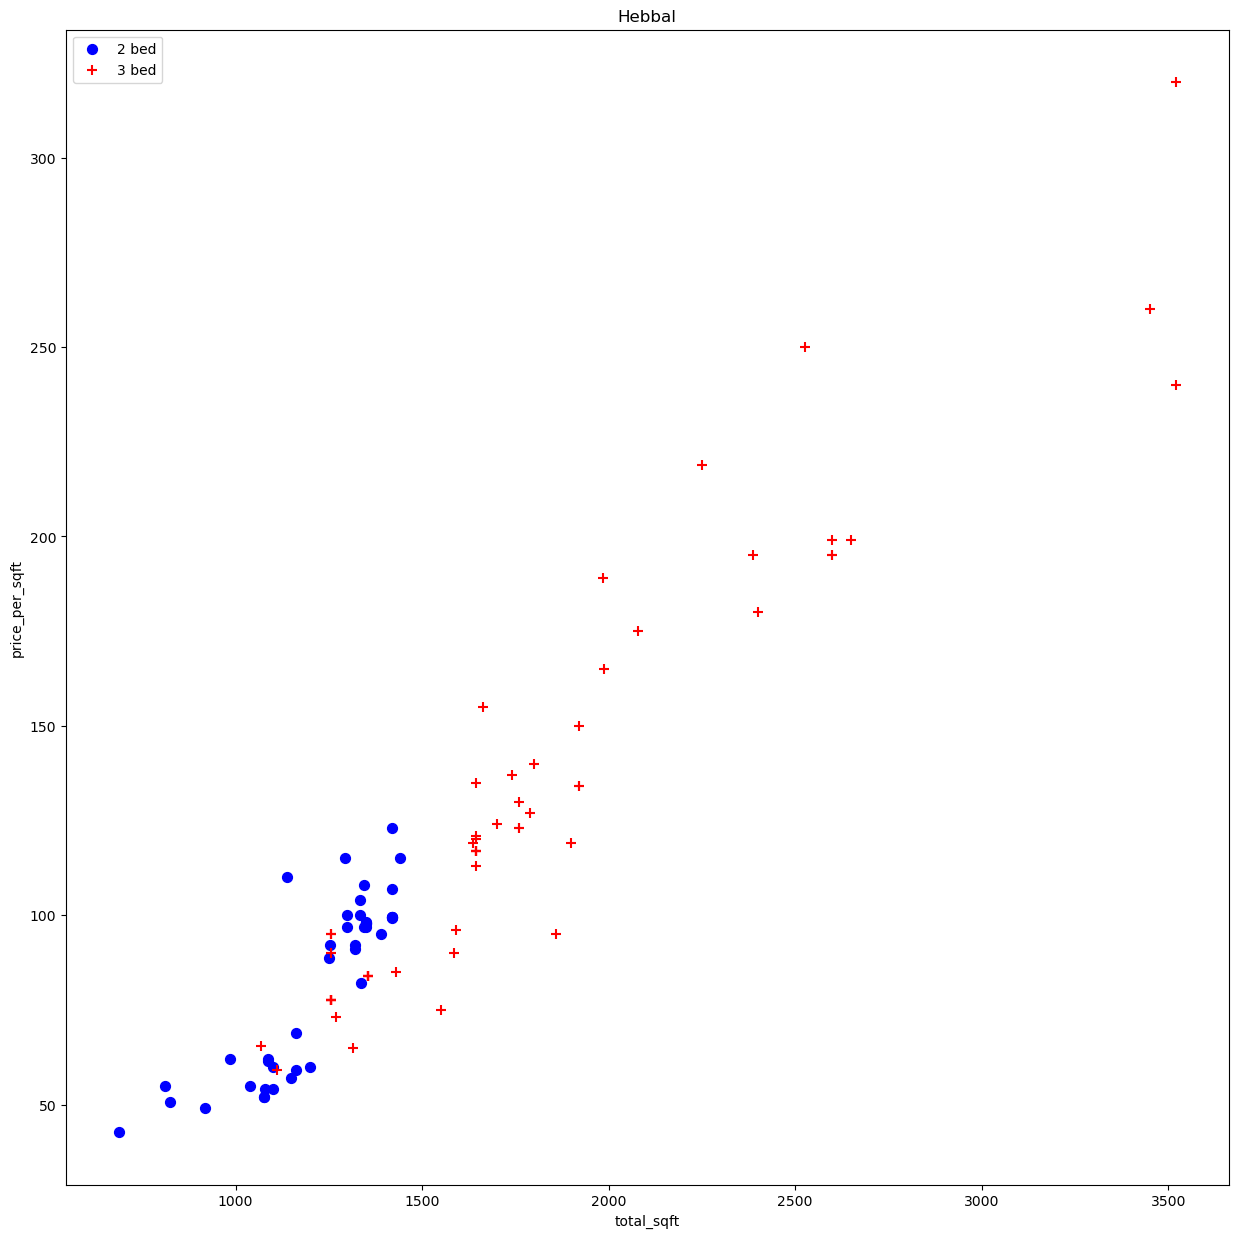

In [142]:
plot_scatter_chart(df,"Hebbal")

In [143]:
#here we remove outliers in which an apartment with lesser size and bathrooms is more costly than on with more size and bathrooms
def remove_size_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        size_stats = {}
        for size, size_df in location_df.groupby('size'):  # Fix: Change 'location_df.groupby('location')' to 'location_df.groupby('size')'
            size_stats[size] = {
                'mean' : np.mean(size_df['price_per_sqft']),
                'std' : np.std(size_df['price_per_sqft']),
                'count' : size_df.shape[0]
            }
        for size, size_df in location_df.groupby('size'):  # Fix: Change 'location_df.groupby('location')' to 'location_df.groupby('size')'
            stats = size_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,size_df[size_df['price_per_sqft']< (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis='index')

In [144]:
df1 = remove_size_outliers(df)

In [145]:
df1.shape

(7329, 6)

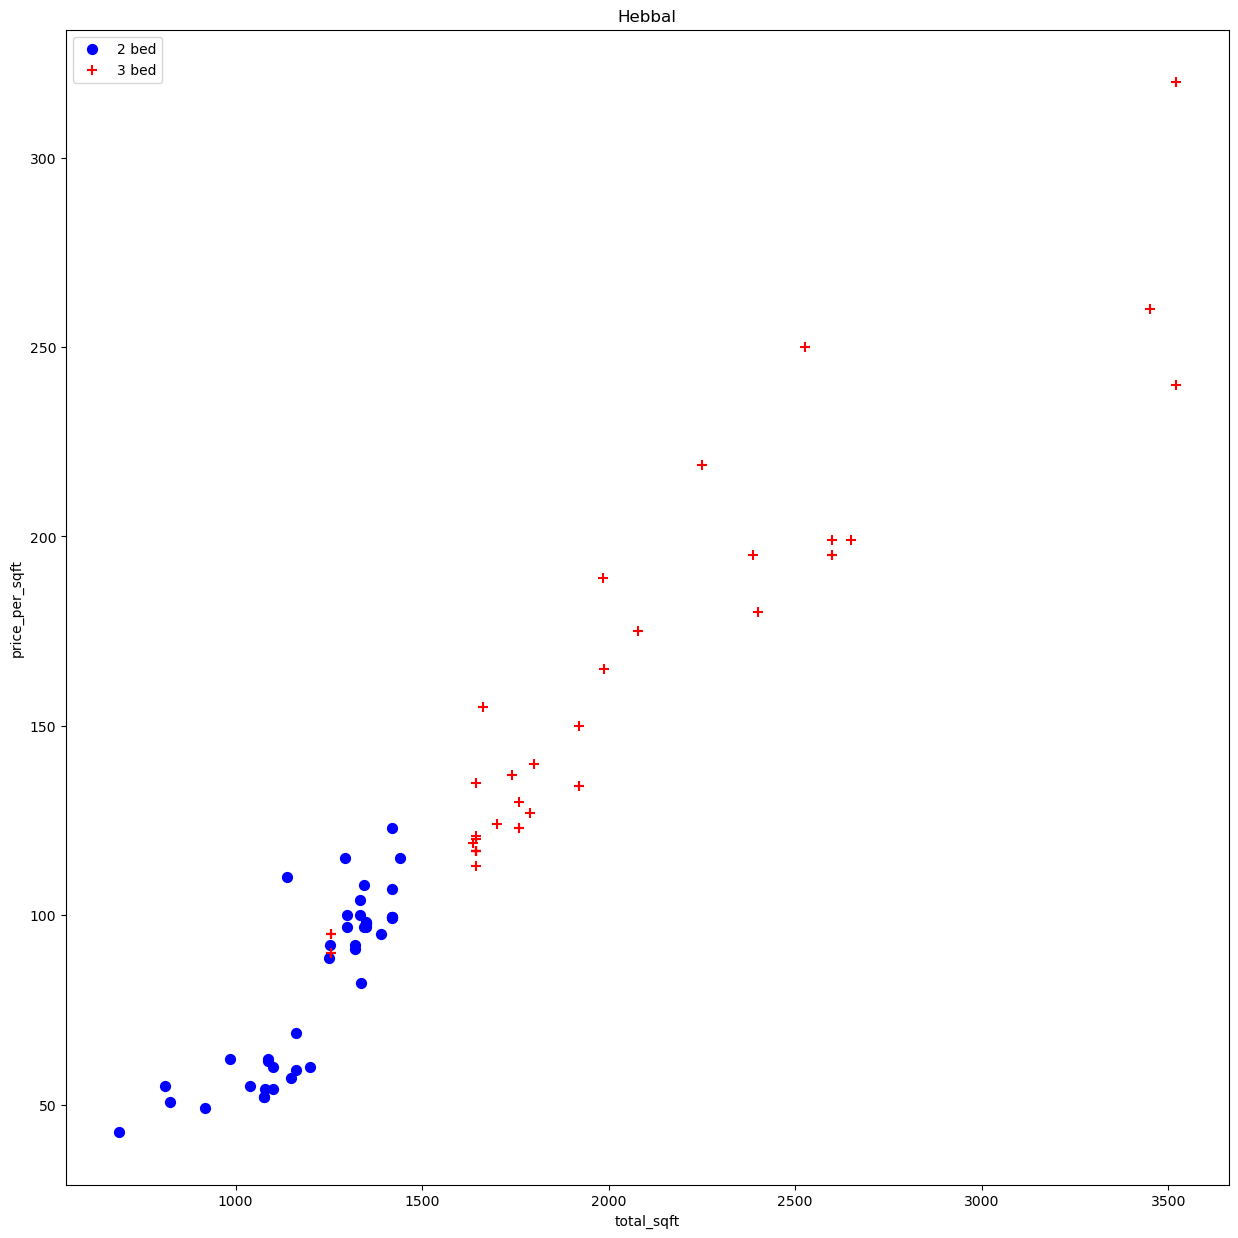

In [146]:
plot_scatter_chart(df1,"Hebbal")

In [147]:
#here we apply the logic that an apartment can't bathrooms greater than bedrooms+2
df2 = df1[df1['bath']<df1['size']+2]

In [148]:
df3 = df2.drop(['price_per_sqft'], axis = 'columns')

In [149]:
df3.head()

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [150]:
dummies = pd.get_dummies(df3.location, drop_first=True)
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [151]:
df4 = pd.concat([df3.drop(['location'], axis = 'columns'), dummies], axis = 'columns')
df4.head(3)

,size,total_sqft,bath,price,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,428.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
x = df4.drop('price', axis = 'columns')
x.head(2)

,size,total_sqft,bath,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
y = df4['price']
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Using the algorithm standalone method

In [188]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

In [189]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [198]:
x_test

,size,total_sqft,bath,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
2508,2,1080.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,2,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1800,2,1005.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764,2,1170.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,2,1295.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,2,1210.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,3,1720.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2525,3,2800.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,2,1060.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
rf_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [158]:
lr_model.score(x_test, y_test)

0.8328307390131537

In [159]:
rf_model.score(x_test, y_test)

0.7646981987666265

In [160]:
dt_model.score(x_test, y_test)

0.6082520748630281

In [161]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Using the K-fold cross validation method

In [162]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x_train, y_train, cv=cv)

array([0.8641934 , 0.84776746, 0.84366889, 0.86199847, 0.84096205])

In [163]:
cross_val_score(DecisionTreeRegressor(), x_train, y_train)

array([0.87270148, 0.78875202, 0.76305062, 0.73817675, 0.84438678])

In [164]:
cross_val_score(RandomForestRegressor(), x_train, y_train)

array([0.83789931, 0.85975892, 0.77489282, 0.6812242 , 0.87933   ])

# Using the GridSearch CV method

In [165]:
from sklearn.model_selection import GridSearchCV

#here we're using the GridSearch CV method on the DecisionTreeRegressor algorithm
clf = GridSearchCV(DecisionTreeRegressor(), {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best','random']
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)
clf.cv_results_

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Use

{'mean_fit_time': array([0.11202755, 0.10598931, 1.80978813, 1.52766695, 0.10424829,
        0.10090294, 2.02564812, 1.69460855]),
 'std_fit_time': array([0.01426947, 0.00591601, 0.04256599, 0.0597267 , 0.00021274,
        0.00406797, 0.05314813, 0.08024237]),
 'mean_score_time': array([0.        , 0.        , 0.05769882, 0.06084032, 0.        ,
        0.        , 0.05765123, 0.0619154 ]),
 'std_score_time': array([0.        , 0.        , 0.00315512, 0.0039991 , 0.        ,
        0.        , 0.0031085 , 0.00322427]),
 'param_criterion': masked_array(data=['mse', 'mse', 'friedman_mse', 'friedman_mse', 'mae',
                    'mae', 'poisson', 'poisson'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_splitter': masked_array(data=['best', 'random', 'best', 'random', 'best', 'random',
                    'best', 'random'],
              mask=[False, False, False, False, False, False, False, Fal

In [166]:
df = pd.DataFrame(clf.cv_results_)
df[['param_criterion','param_splitter','mean_test_score']]

,param_criterion,param_splitter,mean_test_score
0,mse,best,NaN
1,mse,random,NaN
2,friedman_mse,best,0.757888
3,friedman_mse,random,0.743435
4,mae,best,NaN
5,mae,random,NaN
6,poisson,best,0.675124
7,poisson,random,0.744814


In [167]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [168]:
find_best_model(x, y)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Use

,model,best_score,best_params
0,linear_regression,0.818354,{'fit_intercept': True}
1,lasso,0.699289,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.759883,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [169]:
X = df4.drop('price', axis = 'columns')
y = df4['price']
X.head()

,size,total_sqft,bath,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
#this function will be called any time we want to predict the price of an apartment with some specs
def predict_price(location, size, sqft, bath):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = sqft
    x[2] = bath
    if loc_index >=0:
        x[loc_index] = 1
#     print(x)
    return lr_model.predict([x])[0]

In [171]:
predict_price('1st Phase JP Nagar', 2, 1000, 2)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.8125508994269

In [193]:
predict_price('Indira Nagar', 3, 1000, 3)

C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.8080517049443

In [181]:
import pickle
with open('Bengaluru_House_Data_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [182]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [183]:
col = ''
with open('columns.json', 'r') as f:
    col = json.load(f)['data_columns']

In [184]:
for i in col[3:]:
    print(i)

1st phase jp nagar
2nd phase judicial layout
2nd stage nagarbhavi
5th block hbr layout
5th phase jp nagar
6th phase jp nagar
7th phase jp nagar
8th phase jp nagar
9th phase jp nagar
aecs layout
abbigere
akshaya nagar
ambalipura
ambedkar nagar
amruthahalli
anandapura
ananth nagar
anekal
anjanapura
ardendale
arekere
attibele
beml layout
btm 2nd stage
btm layout
babusapalaya
badavala nagar
balagere
banashankari
banashankari stage ii
banashankari stage iii
banashankari stage v
banashankari stage vi
banaswadi
banjara layout
bannerghatta
bannerghatta road
basavangudi
basaveshwara nagar
battarahalli
begur
begur road
bellandur
benson town
bharathi nagar
bhoganhalli
billekahalli
binny pete
bisuvanahalli
bommanahalli
bommasandra
bommasandra industrial area
bommenahalli
brookefield
budigere
cv raman nagar
chamrajpet
chandapura
channasandra
chikka tirupathi
chikkabanavar
chikkalasandra
choodasandra
cooke town
cox town
cunningham road
dasanapura
dasarahalli
devanahalli
devarachikkanahalli
dodda nek

In [185]:
with open('Bengaluru_House_Data_model.pickle', 'rb') as f:
    lr_model = pickle.load(f)

In [195]:
import pickle

# Save the model to a file using pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)


In [200]:
import pickle

# Load the saved model from the file
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)


In [204]:
try:
    loc_index = columns.index('bannerghatta'.lower())
except:
    loc_index = -1

x = np.zeros(len(columns))
x[0] = 2
x[1] = 1290
x[2] = 3
if loc_index >=0:
    x[loc_index] = 1

# Perform the prediction using the loaded model
predicted_price = model.predict([x])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [201]:
model

LinearRegression()